## Importing Libraries/ Read Dataset

In [72]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import warnings
warnings.filterwarnings('ignore')


In [4]:
# importing our sales training data
sales_train_df = pd.read_csv('train.csv')

/var/folders/2p/cp2l1q2x42l6jgt20fhqkpsw0000gn/T/ipykernel_88543/563876541.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv('train.csv')


In [6]:
sales_train_df
# almost a million observation 
# 1115 unique stores 
# Note that sales is the target variable (that's what we are trying to predict) 

# Id: transaction ID (combination of Store and date) 
# Store: unique store Id
# Sales: sales/day in Euros, this is the target variable 
# Customers: number of customers on a given day
# Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
# Promo: describes if store is running a promo on that day or not
# StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
# Data Source: https://www.kaggle.com/c/rossmann-store-sales/data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [7]:
sales_train_df.info(verbose=1)
# 9 columns in total 
# 8 features, each contains 1017209 data points
# 1 target variable (sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [12]:
sales_train_df.describe(include='all')
# Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551 
# Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388
# Unique values for StateHoliday = 5, top label is 0 and it appears 855,087 out of 1,017,209

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [13]:
store_info_df = pd.read_csv('store.csv')

In [14]:
store_info_df
# StoreType: categorical variable to indicate type of store (a, b, c, d)
# Assortment: describes an assortment level: a = basic, b = extra, c = extended
# CompetitionDistance (meters): distance to closest competitor store
# CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open
# Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
# Promo2Since [Year/Week]: date when the store started participating in Promo2
# PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [15]:
store_info_df.info()
# This dataframe only includes information about the unique 1115 stores that are part of this study 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [16]:
# on average, the competition distance is 5404 meters away (5.4 kms)
# on average, half the store participate in continuous promotions (Promo2)
store_info_df.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


## Data Exploration

### Explore Sales Dataset

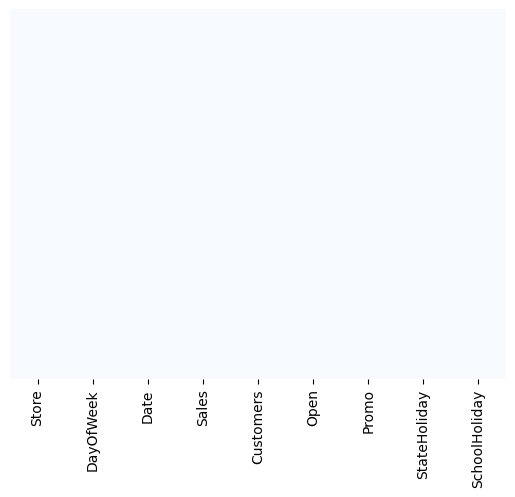

In [19]:
# Let's see how many nulls we have
sns.heatmap(sales_train_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
plt.show()

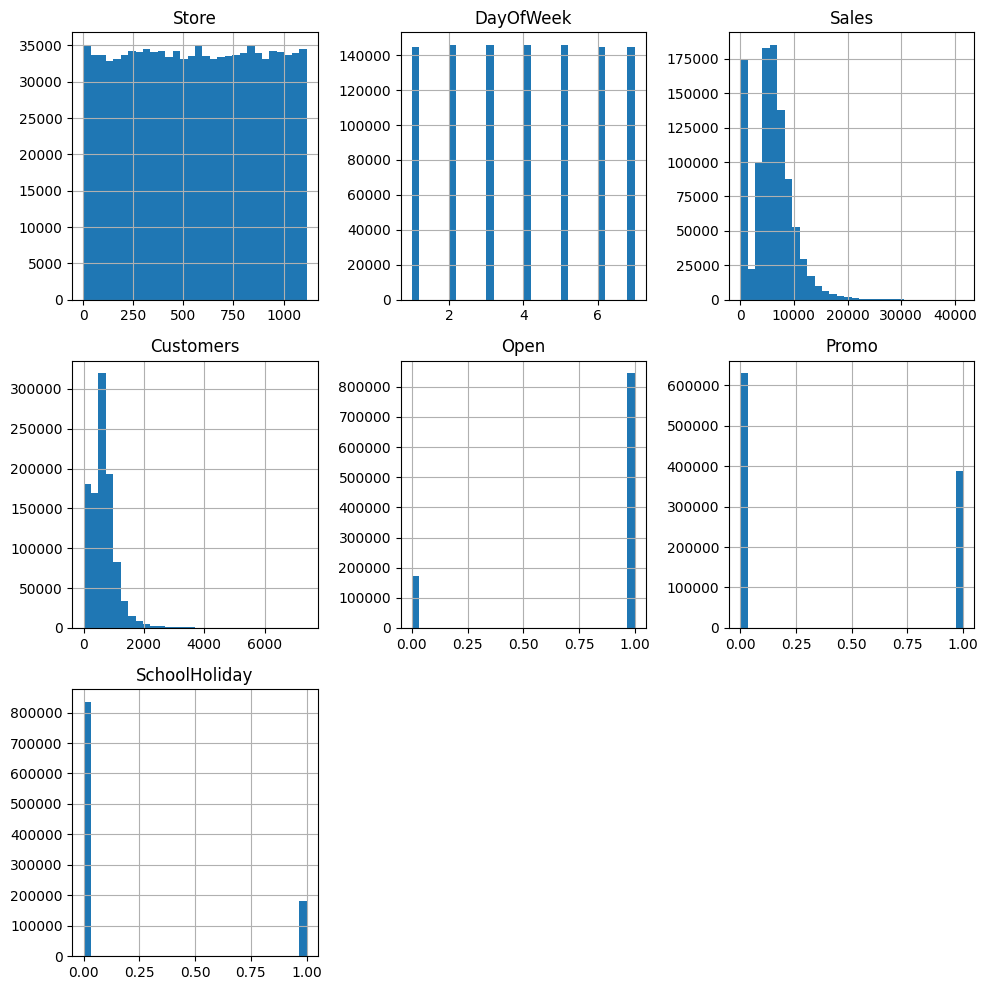

In [25]:
# Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
# Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation) 
# Stores are open ~80% of the time
# Data is equally distributed among all stores (no bias)
# Promo #1 was running ~40% of the time 
# Average sales around 5000-6000 Euros
# School holidays are around ~18% of the time
sales_train_df.hist(bins=30, figsize=(10,10))
plt.tight_layout()
plt.show()

In [31]:
sales_train_df.Customers.max()

7388

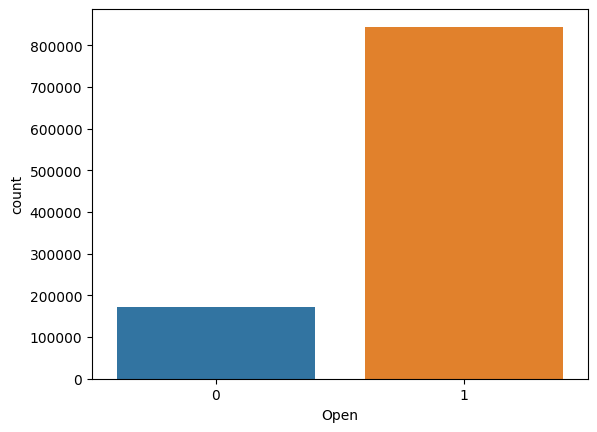

In [37]:
# let's see how many stores are open
sns.countplot(x = sales_train_df['Open'])
plt.show()

In [39]:
# Let's only keep the Open stores since most values are 0 and drop the collumn since it only

sales_train_df.query('Open == 0').describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,172817.000000,172817.000000,172817.0,172817.0,172817.0,172817.000000,172817.000000
mean,558.462987,6.333769,0.0,0.0,0.0,0.064716,0.105684
std,322.771734,1.547688,0.0,0.0,0.0,0.246025,0.307434
min,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000
25%,279.000000,7.000000,0.0,0.0,0.0,0.000000,0.000000
50%,560.000000,7.000000,0.0,0.0,0.0,0.000000,0.000000
75%,839.000000,7.000000,0.0,0.0,0.0,0.000000,0.000000
max,1115.000000,7.000000,0.0,0.0,0.0,1.000000,1.000000


In [43]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1].drop(columns='Open')

In [44]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [45]:
# Now the numbers are quite different
# Average sales = 6955 Euros,	average number of customers = 762	(went up)
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


### Explore Stores Dataset

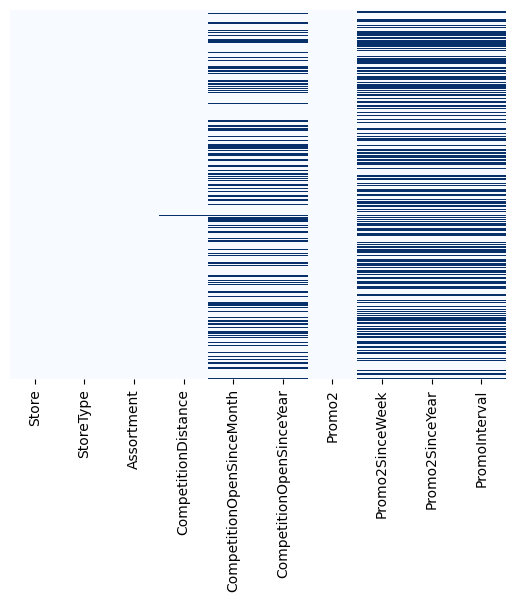

In [46]:
# Let's see how many nulls we have
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
plt.show()

In [47]:
# Let's take a look at the missing values in the 'CompetitionDistance'
# Only 3 rows are missing 
store_info_df[store_info_df.CompetitionDistance.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [54]:
# CompetitionOpenSinceMonth has 354 nulls
store_info_df[store_info_df.CompetitionOpenSinceMonth.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [56]:
# whenver CompetitionOpenSinceMonth, CompetitionOpenSinceYear is also null
store_info_df[store_info_df.CompetitionOpenSinceMonth.isnull() & ~(store_info_df.CompetitionOpenSinceYear.isnull())]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [50]:
# Let's look at Promo2SinceWeek	Promo2SinceYear	PromoInterval and see if it is related to the values of Promo2
store_info_df[store_info_df.drop(['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'],axis=1).isnull().any(axis=1)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [51]:
# Promo2SinceWeek	Promo2SinceYear	PromoInterval whenever promo2 is equal to 0
store_info_df[store_info_df.drop(['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'],axis=1).isnull().any(axis=1)]['Promo2'].unique()

array([0])

In [59]:
# Let's fill all those missing values with 0 except CompetitionDistance

store_info_df[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']] = store_info_df[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].fillna(0)

In [63]:
# There are 3 rows with 'competitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace=True)

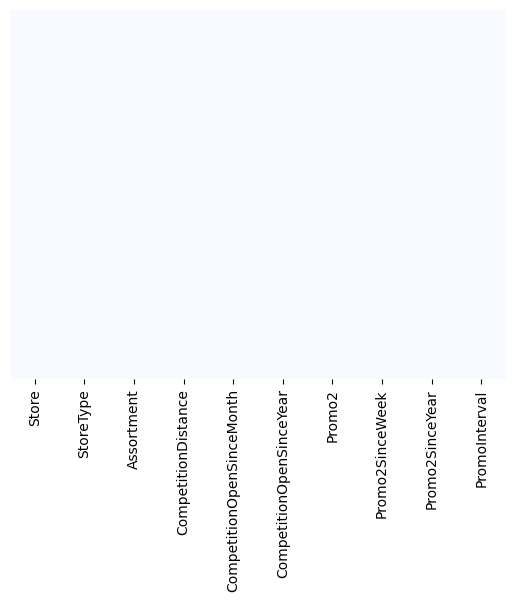

In [64]:
# Let's see how many nulls we have now
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
plt.show()

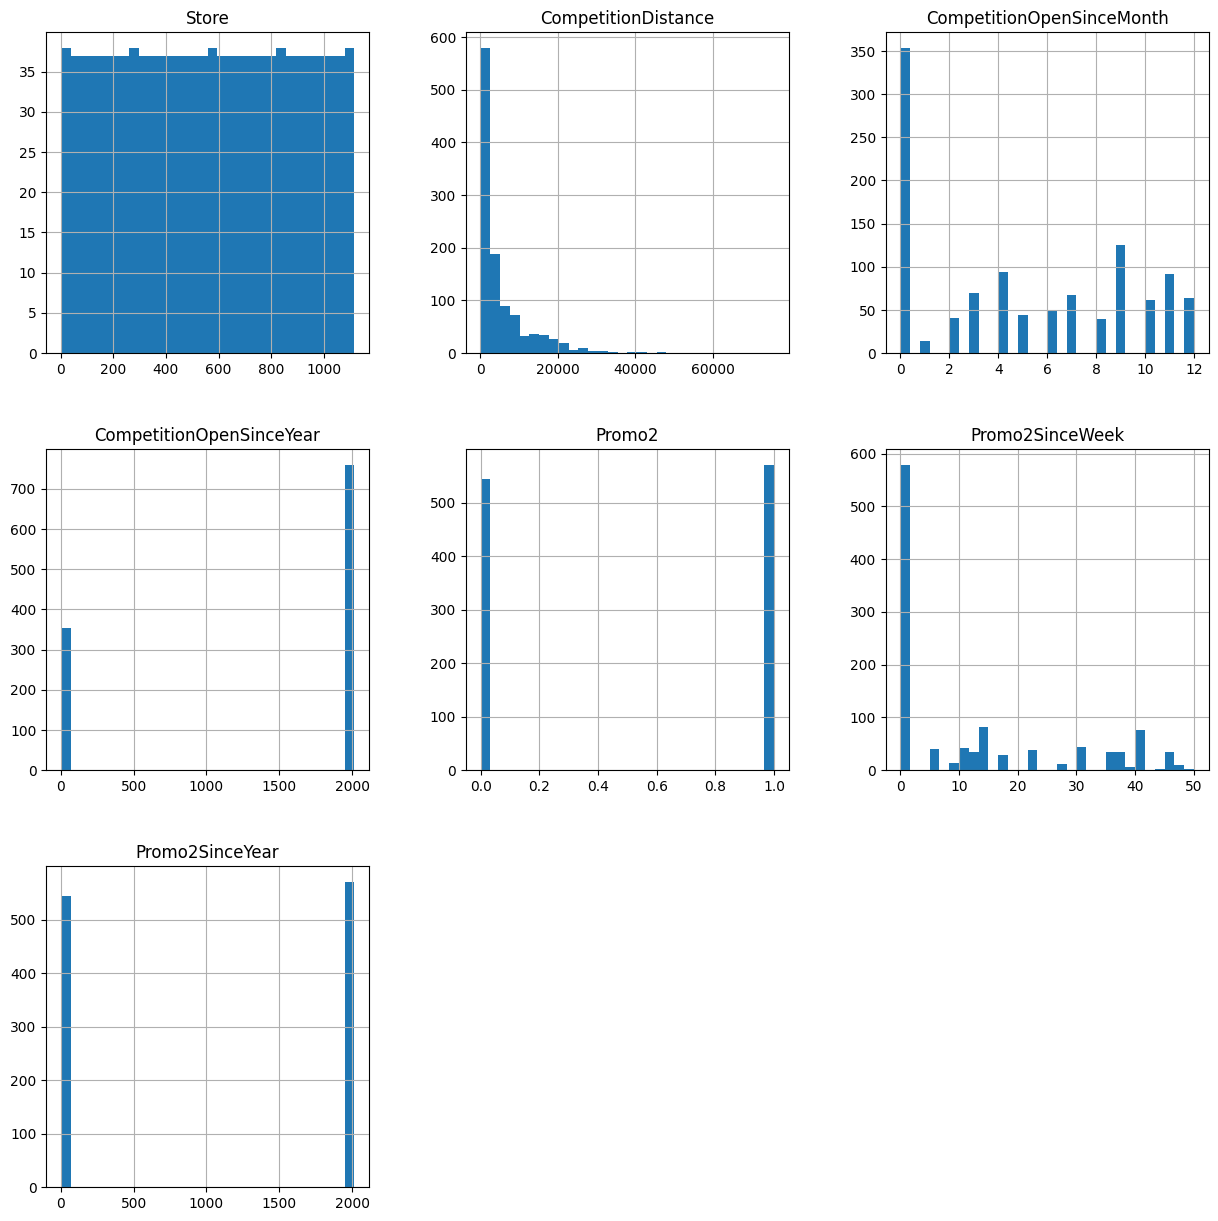

In [66]:
# half of stores are involved in promo 2
# half of the stores have their competition at a distance of 0-3000m (3 kms away)
store_info_df.hist(bins=30, figsize=(15,15))
plt.show()

### Explore Merged Dataset

In [68]:
sales_train_all_df = sales_train_df.merge(store_info_df, on= 'Store', how='inner')

In [69]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


In [73]:
sales_train_all_df.corr()['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
SchoolHoliday                0.038617
Store                        0.007710
CompetitionOpenSinceYear     0.005266
CompetitionOpenSinceMonth   -0.018370
CompetitionDistance         -0.036343
Promo2SinceWeek             -0.058476
Promo2                      -0.127596
Promo2SinceYear             -0.127621
DayOfWeek                   -0.178736
Name: Sales, dtype: float64

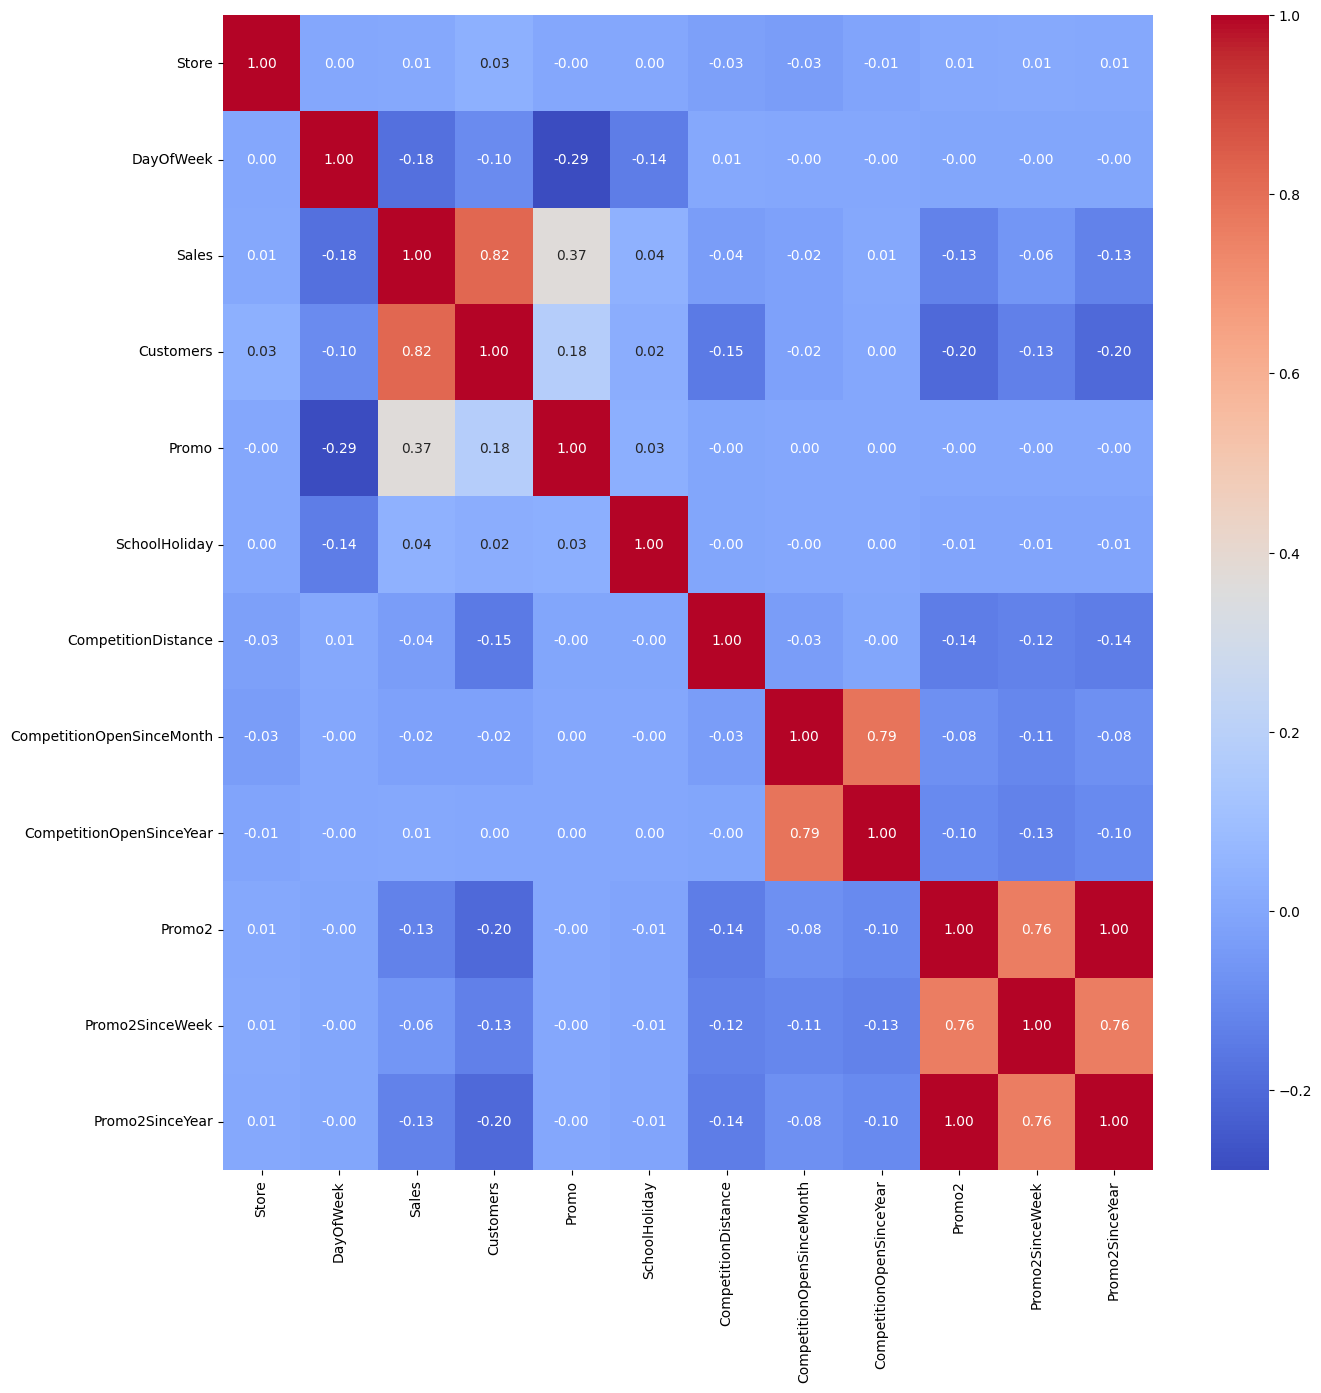

In [78]:
# Customers/Promo and sales are strongly correlated 
plt.figure(figsize=(15, 15))
sns.heatmap(sales_train_all_df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [87]:
sales_train_all_df['Year'] = pd.to_datetime(sales_train_all_df['Date']).dt.year
sales_train_all_df['Month'] = pd.to_datetime(sales_train_all_df['Date']).dt.month
sales_train_all_df['Day'] = pd.to_datetime(sales_train_all_df['Date']).dt.day

In [88]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


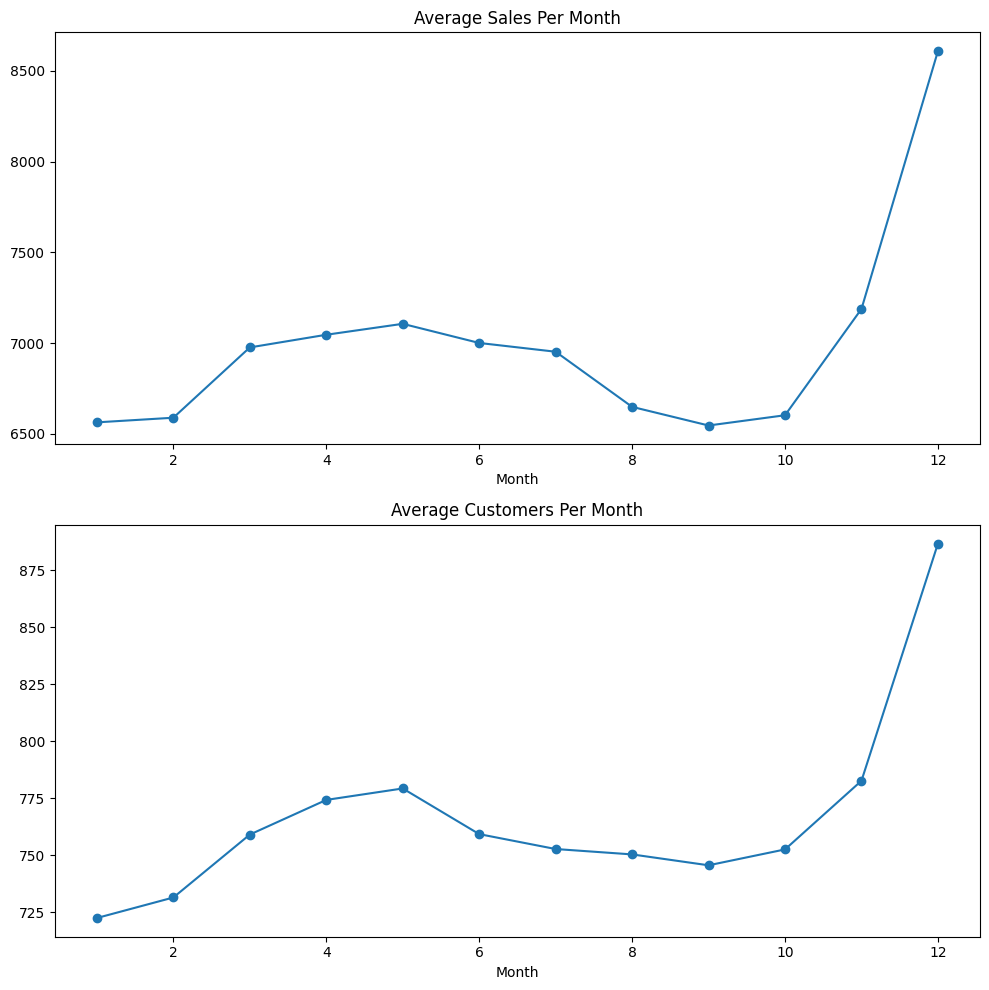

In [99]:
# Let's take a look at the average sales and number of customers per month
# It looks like sales and number of customers peak around christmas timeframe
f, ax = plt.subplots(2,1, figsize= (10,10))

sales_train_all_df.groupby('Month')['Sales'].mean().plot(marker= 'o', ax= ax[0])
ax[0].set_title('Average Sales Per Month')

sales_train_all_df.groupby('Month')['Customers'].mean().plot(marker= 'o',  ax= ax[1])
ax[1].set_title('Average Customers Per Month')

plt.tight_layout()

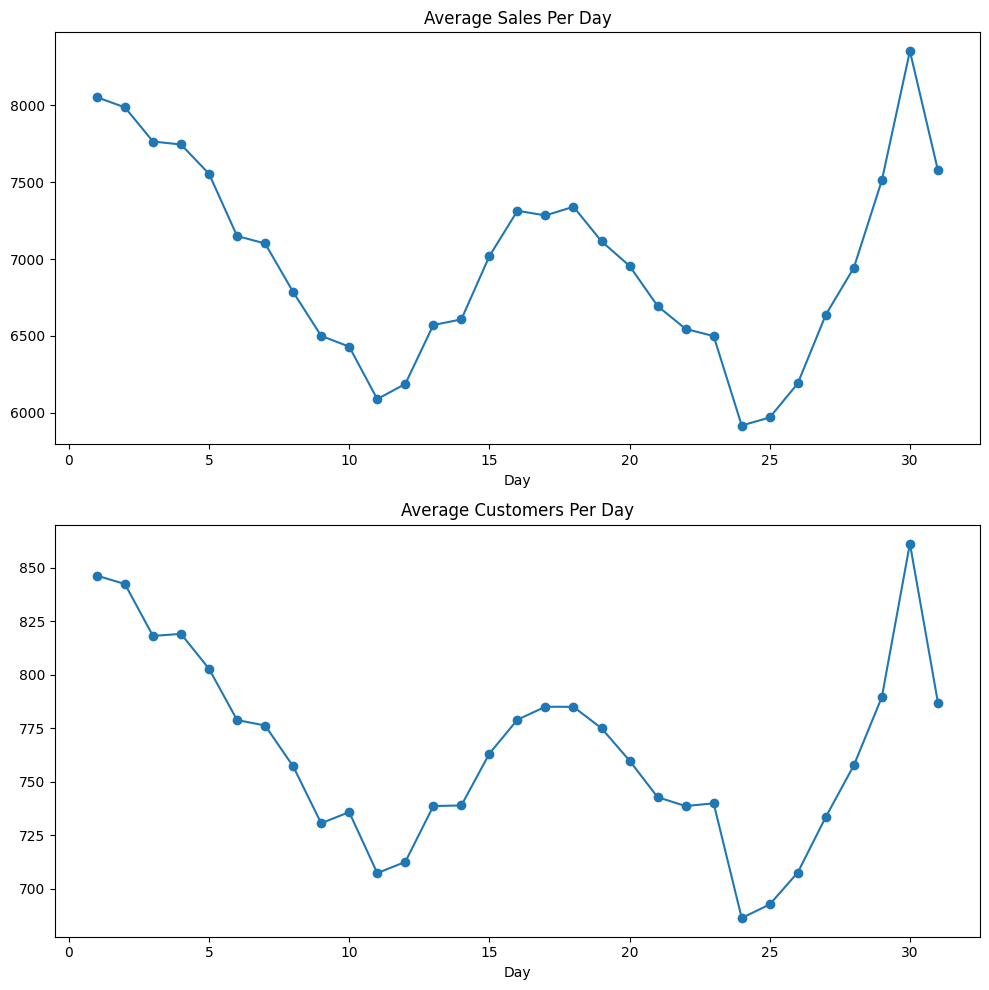

In [102]:
# Let's take a look at the average sales and number of customers per day
# Minimum number of customers are generally around the 24th of the month 
# Most customers and sales are around 30th and 1st of the month
f, ax = plt.subplots(2,1, figsize= (10,10))

sales_train_all_df.groupby('Day')['Sales'].mean().plot(marker= 'o', ax= ax[0])
ax[0].set_title('Average Sales Per Day')

sales_train_all_df.groupby('Day')['Customers'].mean().plot(marker= 'o',  ax= ax[1])
ax[1].set_title('Average Customers Per Day')

plt.tight_layout()

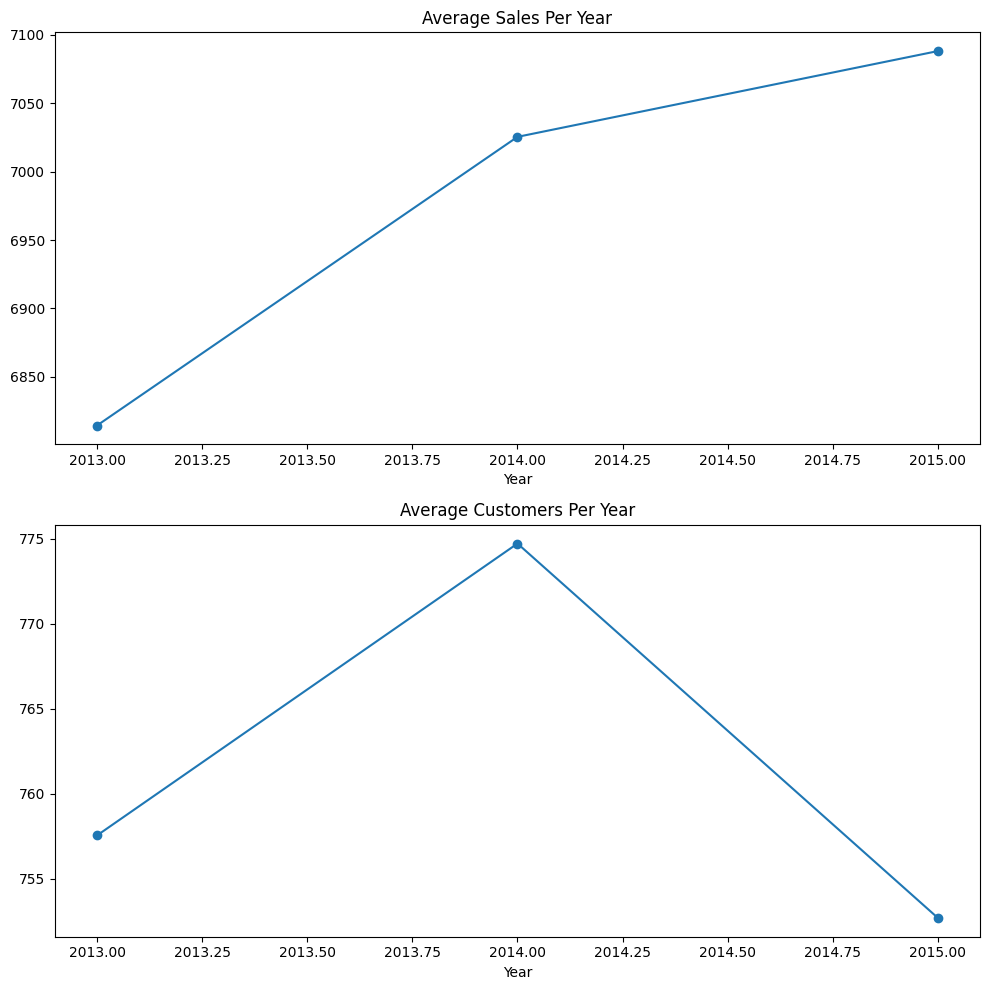

In [103]:
# Let's take a look at the average sales and number of customers per Year
# It looks like sales numbers continue to increase but customers stay more less the same
f, ax = plt.subplots(2,1, figsize= (10,10))

sales_train_all_df.groupby('Year')['Sales'].mean().plot(marker= 'o', ax= ax[0])
ax[0].set_title('Average Sales Per Year')

sales_train_all_df.groupby('Year')['Customers'].mean().plot(marker= 'o',  ax= ax[1])
ax[1].set_title('Average Customers Per Year')

plt.tight_layout()

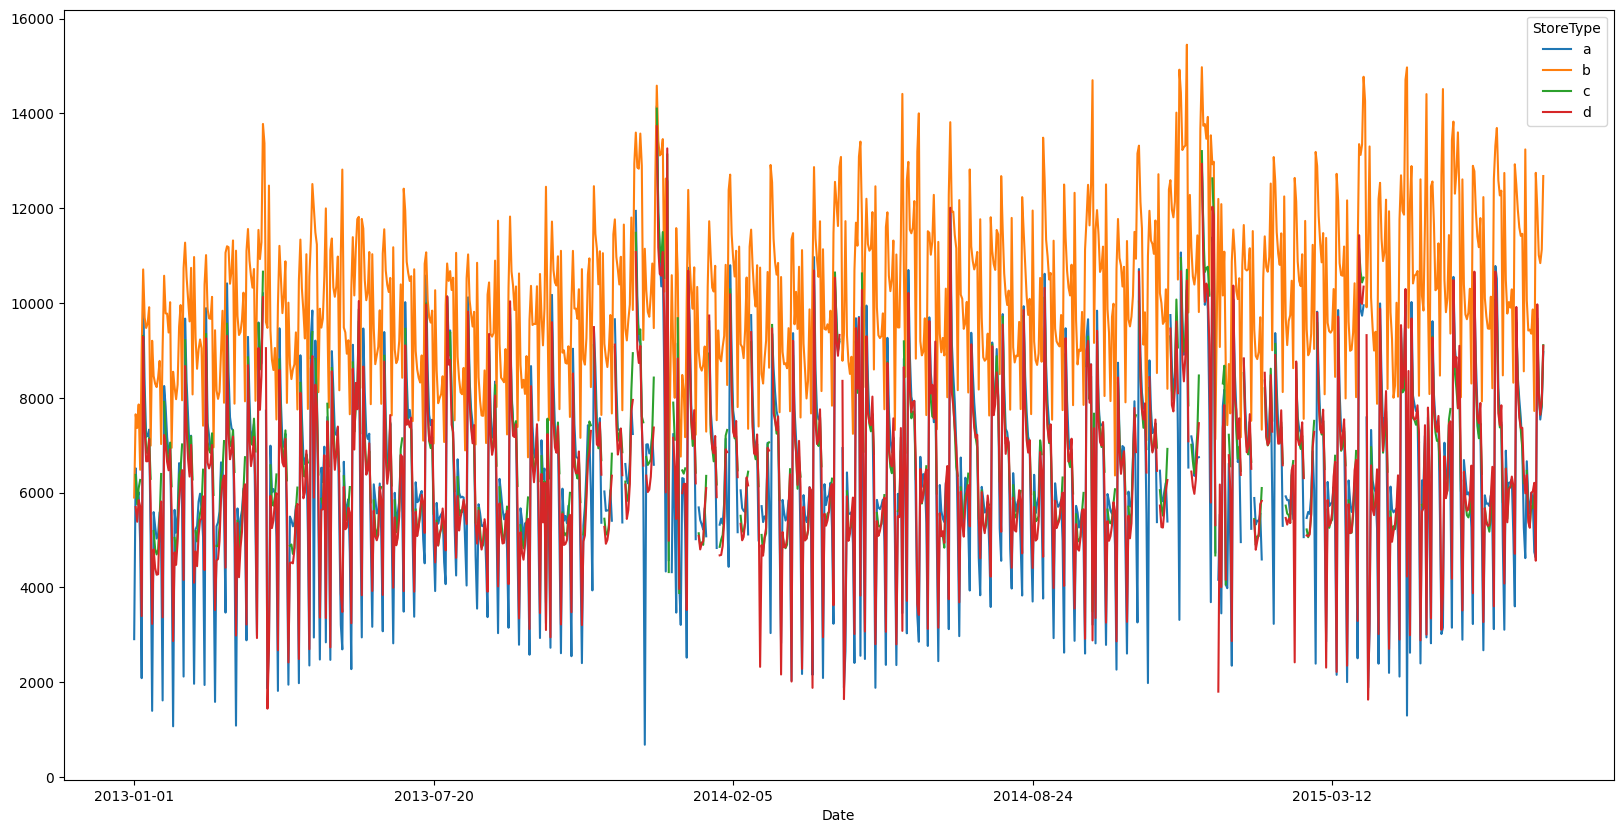

In [269]:
# b has the highest sales while c has average ammount of sales per month
f, ax = plt.subplots(figsize= (20, 10))
sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax= ax)
plt.show()

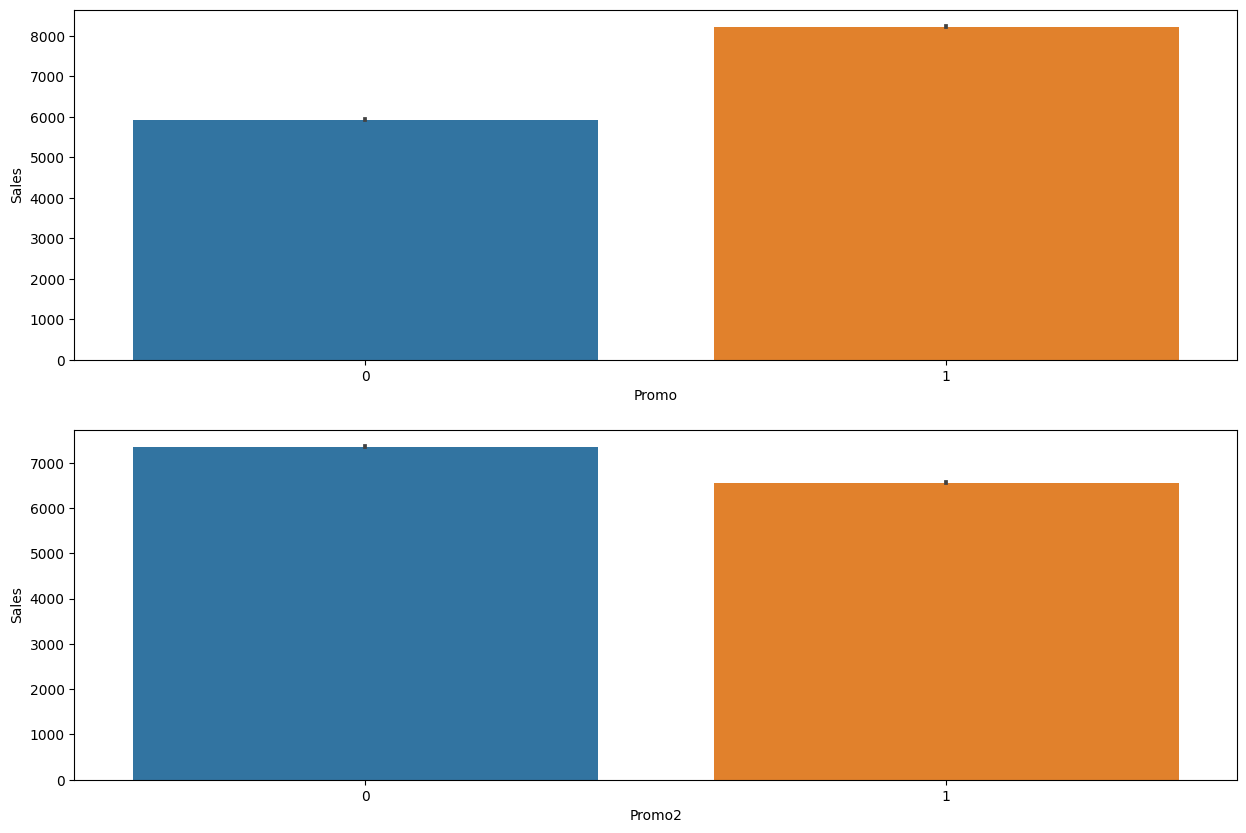

In [120]:
# Let's see if promo and promo2 have an affect of sales
# in both promo and promo2 the sales go up

plt.figure(figsize= (15,10))

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)
plt.subplot(212)
sns.barplot(x = 'Promo2', y = 'Sales', data = sales_train_all_df)
plt.show()

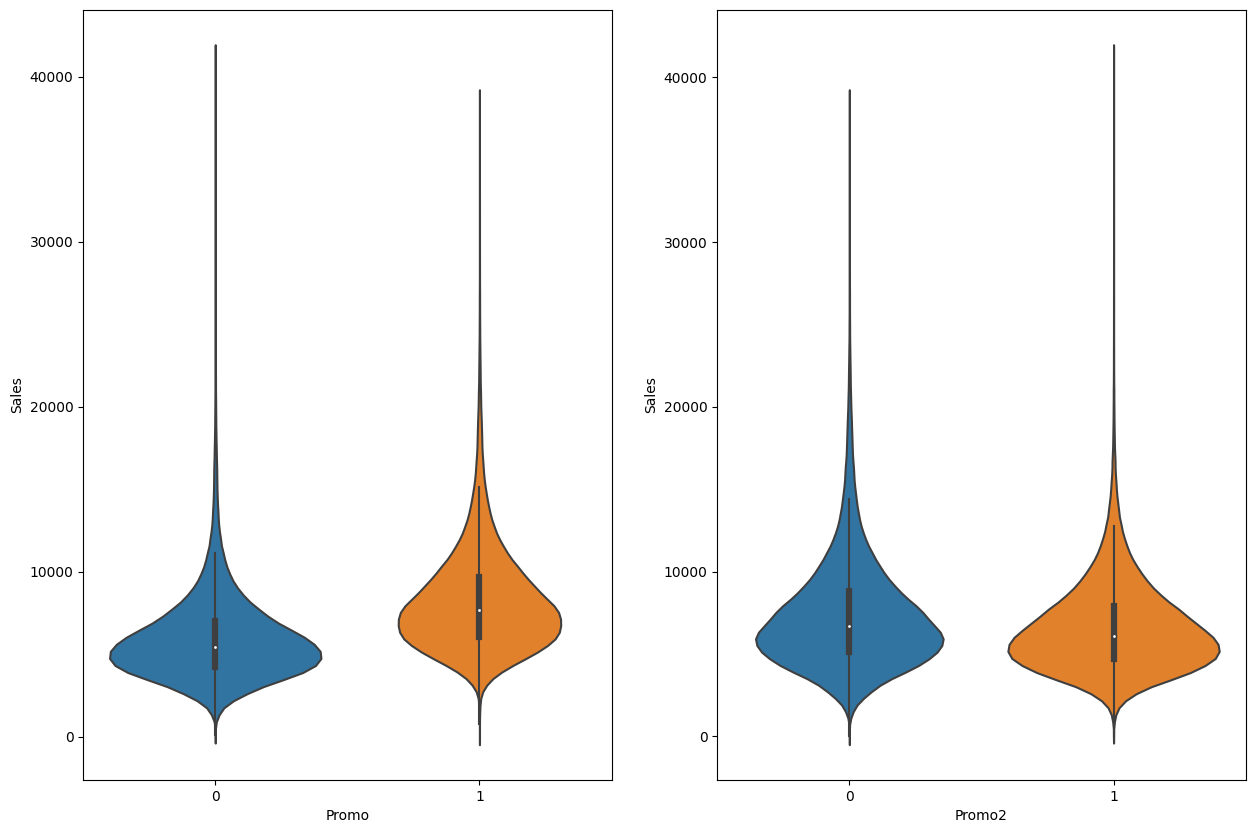

In [123]:
# Let's see with a violin plot
# the average sales is always higher when promo and promo2 are 1
plt.figure(figsize= (15,10))

plt.subplot(121)
sns.violinplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)
plt.subplot(122)
sns.violinplot(x = 'Promo2', y = 'Sales', data = sales_train_all_df)
plt.show()

## Facebook Prophet

In [128]:
from prophet import Prophet

In [134]:
def sales_predictions(Store_ID, sales_df, periods):
    sales_df = sales_df[sales_df['Store'] == Store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values('ds')
    
    model = Prophet()
    model.fit(sales_df)
    future = model.make_future_dataframe(periods= periods)
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel = 'Data', ylabel= 'Sales')
    figure2 = model.plot_components(forecast)


13:29:09 - cmdstanpy - INFO - Chain [1] start processing
13:29:11 - cmdstanpy - INFO - Chain [1] done processing


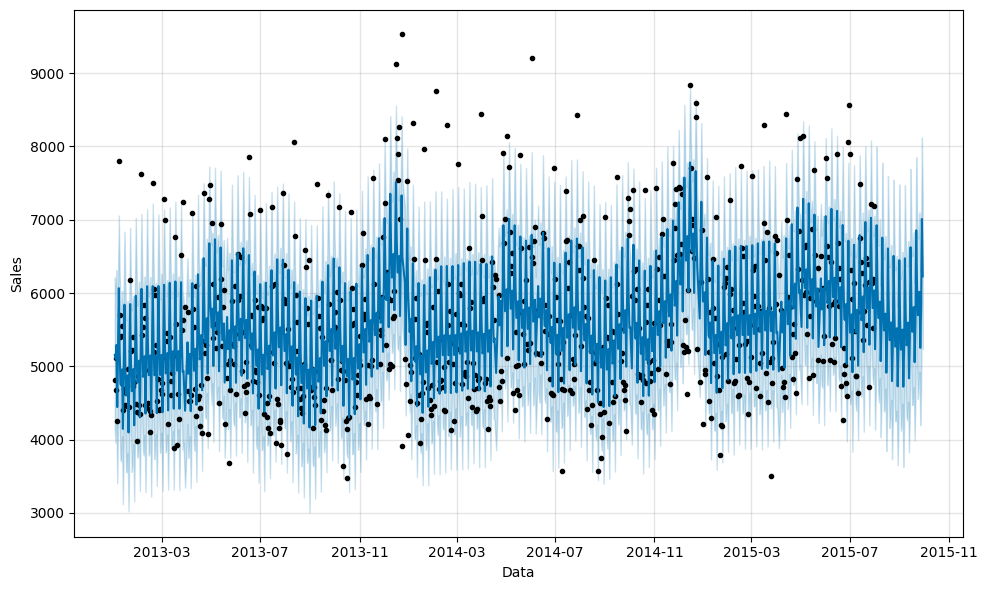

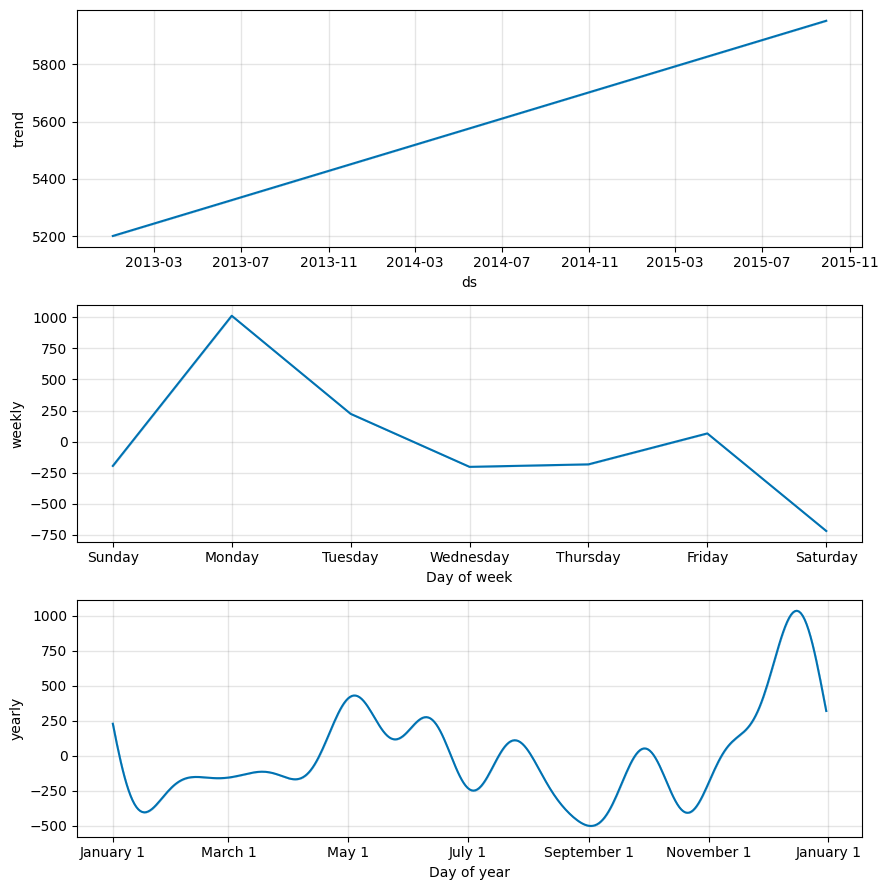

In [135]:
# black dots are our historical data
# it gives us the future sales for every single day in the future with a confidence interval
sales_predictions(10, sales_train_all_df, 60)
# the trends are going upwards
# weekly info: most of the sales happen on mondays and decreasing to the end of the week
# Yearly info: there exists a pick during christmas time in terms of sales

## Including Holidays into prophet


   - StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
   - SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools

In [266]:
def sales_predictions(Store_ID, sales_df, periods):
    sales_df = sales_df[sales_df['Store'] == Store_ID]
    
    holidays_df = pd.melt(sales_df, id_vars=['Date'], value_vars=['StateHoliday', 'SchoolHoliday']).query("(value != 0) and (value != '0')").sort_values('Date')
    holidays_df.loc[holidays_df['value'].isin(['a', 'b', 'c']), 'variable'] = holidays_df.loc[holidays_df['value'].isin(['a', 'b', 'c']), 'value'].map({'a': 'PublicHoliday', 'b': 'EasterHoliday', 'c': 'Christmas'})
    holidays_df = holidays_df.rename(columns={'Date': 'ds', 'variable': 'holiday'}).drop(columns= ['value'])
    
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values('ds')
    
    model = Prophet(holidays=holidays_df)
    model.fit(sales_df)
    future = model.make_future_dataframe(periods= periods)
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel = 'Data', ylabel= 'Sales')
    figure2 = model.plot_components(forecast)
    
    return forecast[['ds', 'yhat']].rename(columns= {'ds': 'Date', 'yhat': 'Sales'}).iloc[-90:].reset_index(drop=True)


17:15:40 - cmdstanpy - INFO - Chain [1] start processing
17:15:40 - cmdstanpy - INFO - Chain [1] done processing


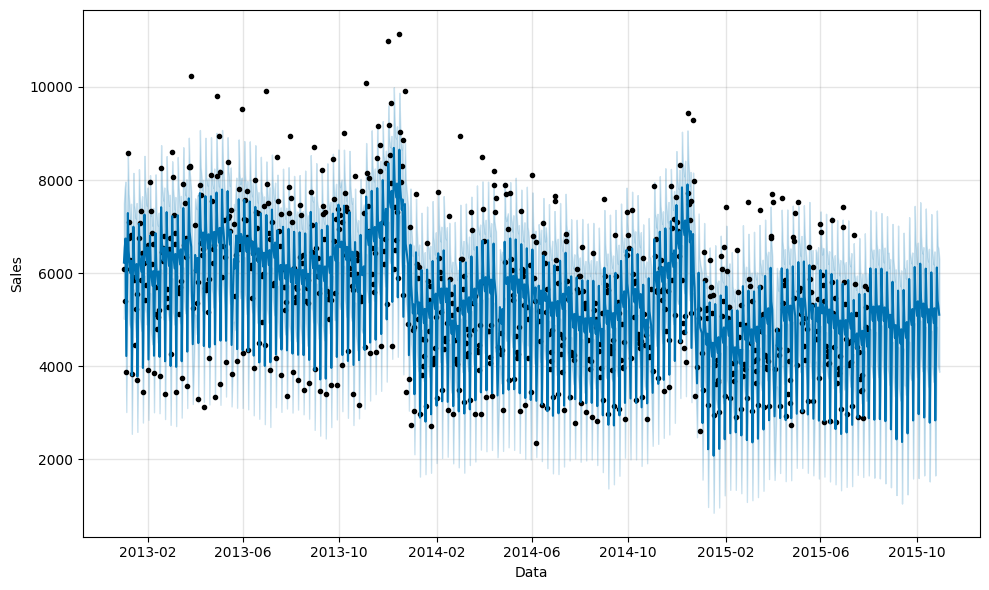

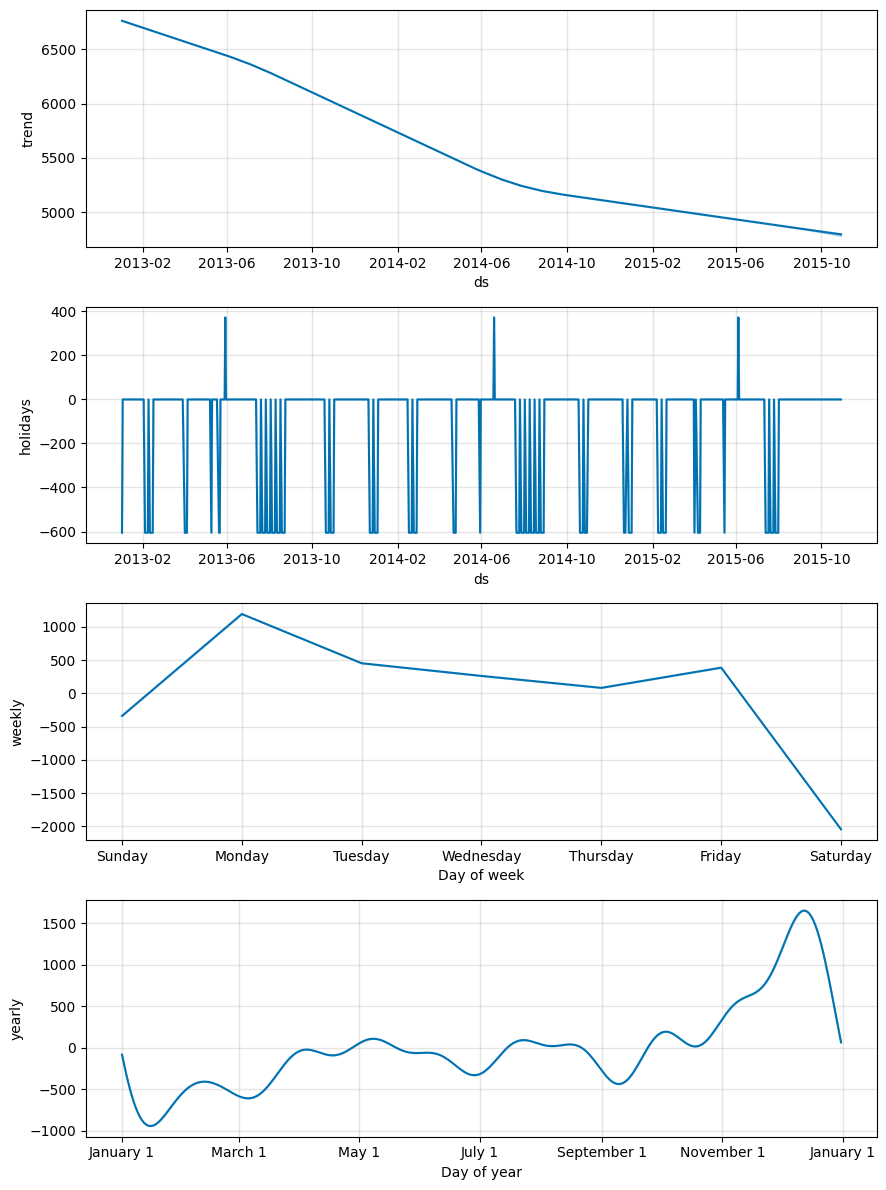

In [267]:
# we can see that the sales treend is going downwards with this Store, 
# the holidays that seem to be more representative of the increase in sale happen around june
# like the other store this one sees more purchases on Mondays
# and more sales seem to happen at the start of December
forecast = sales_predictions(6, sales_train_all_df, 90)

In [268]:
# here we have our predictions from 90 days into the future
forecast

,Date,Sales
0,2015-08-01,2879.750302
1,2015-08-02,4577.084431
2,2015-08-03,6102.357861
3,2015-08-04,5356.199327
4,2015-08-05,5160.856728
...,...,...
85,2015-10-25,4562.135197
86,2015-10-26,6121.021993
87,2015-10-27,5410.200994
88,2015-10-28,5251.209939
